In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths
    '''
    # Read CSV files
    df = pd.read_csv(path_to_csv_file)
    
    return df

# call the function to import data
farmer_df = read_data('/Users/mncedisimncwabe/Downloads/farmer_advisor_dataset.csv')
market_df = read_data('/Users/mncedisimncwabe/Downloads/market_researcher_dataset.csv')

In [4]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    '''
    return display(df.head())

print(f'farmer_df:')
df_snapshot(farmer_df)
print(f'market_df:')
df_snapshot(market_df)

farmer_df:


,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


market_df:


,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138


### 1. How can farming practices be optimised while promoting sustainability and reducing environmental impact?

#### Findings from correlation analysis below:
#### a. Correlation between fertilizer usage and sustainability score
- There is a weak positive correlation (0.01) between firtilizer usage and sustainability score. This means that, increasing fertilizer usage does not have a significant direct impact on improving sustainability. The near-zero correlation value suggests that other factors may be more influential in determining the sustainability score.

#### b. Correlation between pesticide usage and sustainability score
- There is a weak negative correlation (-0.01) between pesticide usage and sustainability score. This indicates that higher pesticide usage tend to have lower sustainability score, although the effect is almost insignificant. 

#### c. Correlation between weather impact (Rain fall) on crop yield (crop yield ton)
- There is a very weak negative relationship between rainfall and crop yield. This suggests that variations in rainfall have minimal direct influence on yield.

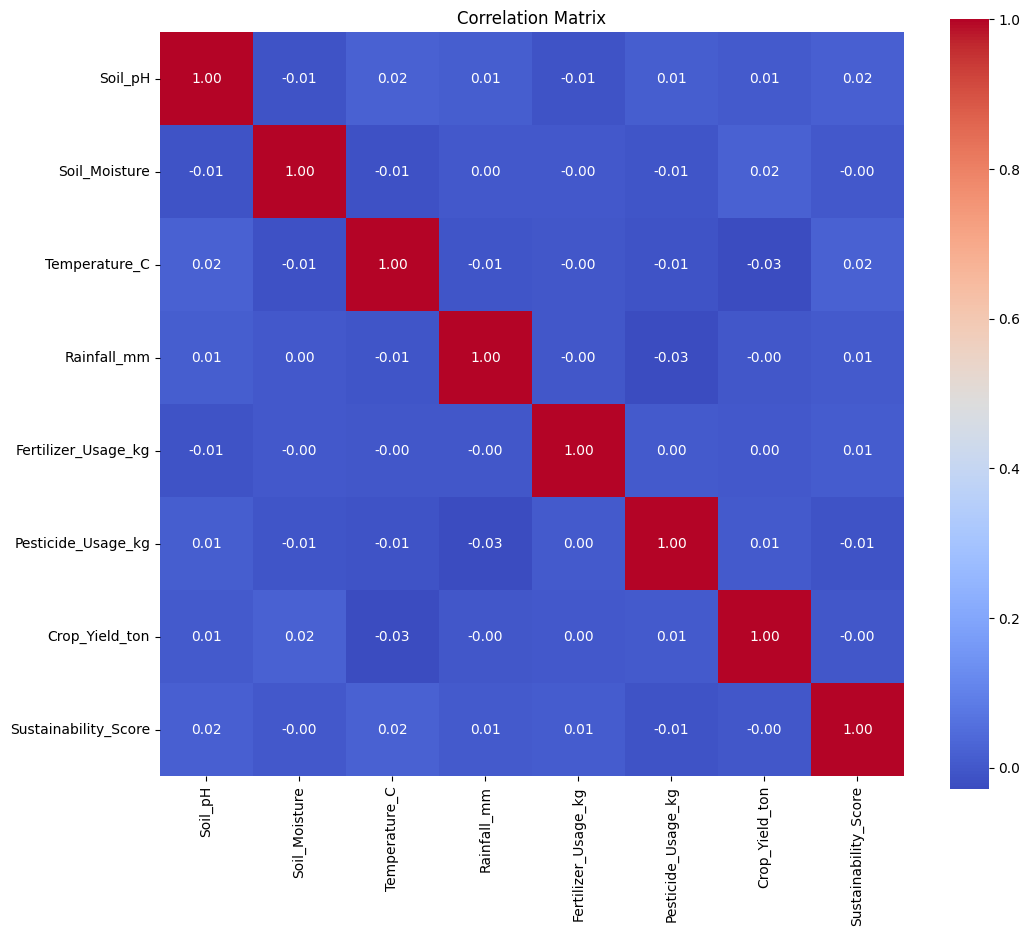

In [6]:
def plot_user_data(df):
    """
    Plots heatmap of the correlation matrix of featuteres.
    """
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')

    plt.show()

# Featurtes to plot correlation for
# This is to explore how firtilizer usage affects sustainability
df_corr_features = farmer_df[['Soil_pH','Soil_Moisture','Temperature_C','Rainfall_mm','Fertilizer_Usage_kg',
                          'Pesticide_Usage_kg',	'Crop_Yield_ton','Sustainability_Score']]
plot_user_data(df_corr_features)

### 2. How can agriculture be transformed into a resource-efficient and profitable endeavour?

#### Findings from  analysis below:

- All crop types have similar average yields (5.4–5.5 tons) and similar sustainability scores (approximately 50). This means that from the farm side alone, no single crop drastically outperforms the others in yield or sustainability.
- The usage of fertilizer averages 125 kg for all crop types, and pesticide averages 10kg for all crop types. Since the ranges are almost identical, this suggests that farmers may already be applying similar input levels across different crops.
- Based in this analysis, given the similar yields and sustainability scores, adopting precision agriculture practices—such as targeted nutrient application and integrated pest management—can further reduce input costs without compromising output, thereby increasing overall profitability.
-  Competitor prices hover around 299–301, suggesting a competitive market where farmers need to keep costs low. Consumer trend indexes (98–100) are all strong, but slight differences hint at more robust consumer interest in certain products such as Rice with higher consumer index.
- With a slightly higher consumer trend index, Rice may offer a premium opportunity. Farmers cultivating rice can benefit from aligning their planting and harvest cycles with peak market demand.


In [10]:
# Aggregate farming metrics by Crop_Type.
farmers_grouped = farmer_df.groupby('Crop_Type').agg({
    'Fertilizer_Usage_kg': 'mean',
    'Pesticide_Usage_kg': 'mean',
    'Crop_Yield_ton': 'mean',
    'Sustainability_Score': 'mean'
}).reset_index()

market_grouped = market_df.groupby('Product').agg({
    'Market_Price_per_ton': 'mean',
    'Demand_Index': 'mean',
    'Supply_Index': 'mean',
    'Competitor_Price_per_ton': 'mean',
    'Economic_Indicator': 'mean',
    'Weather_Impact_Score': 'mean',
    'Consumer_Trend_Index': 'mean'
}).reset_index()

merged_data = pd.merge(farmers_grouped, market_grouped, left_on='Crop_Type', right_on='Product', how='inner')

In [11]:
farmers_grouped

,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,Corn,125.970626,10.315976,5.532548,50.336716
1,Rice,125.225328,10.574321,5.530344,50.121164
2,Soybean,124.207422,10.538798,5.469330,50.020931
3,Wheat,125.482601,10.650718,5.428687,50.377977


In [12]:
market_grouped

,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Consumer_Trend_Index
0,Corn,300.485151,124.713699,125.097808,299.105504,0.996569,49.462663,98.787840
1,Rice,300.840173,126.393042,123.990556,301.775374,1.000971,50.214386,100.397527
2,Soybean,299.146858,124.654164,126.152307,301.608322,1.008414,51.008982,99.230870
3,Wheat,298.084359,124.571301,124.982548,300.691500,1.008041,51.020511,99.861441


In [13]:
merged_data

,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Consumer_Trend_Index
0,Corn,125.970626,10.315976,5.532548,50.336716,Corn,300.485151,124.713699,125.097808,299.105504,0.996569,49.462663,98.787840
1,Rice,125.225328,10.574321,5.530344,50.121164,Rice,300.840173,126.393042,123.990556,301.775374,1.000971,50.214386,100.397527
2,Soybean,124.207422,10.538798,5.469330,50.020931,Soybean,299.146858,124.654164,126.152307,301.608322,1.008414,51.008982,99.230870
3,Wheat,125.482601,10.650718,5.428687,50.377977,Wheat,298.084359,124.571301,124.982548,300.691500,1.008041,51.020511,99.861441


### 3. What trends within the data can be identified with reasoning and solutioning where possible?

#### Findings from  analysis below:

- The data shows little variation in yield or sustainability across fertilizer usage or crop types, suggesting that multiple no single crop type outperforms others significantly. Consistent yields suggest standardized farming practices or relatively uniform growing conditions.

- With similar yields and sustainability, farmers may find bigger gains by reducing input waste (lower costs) and capitalizing on market demand or value-added strategies.


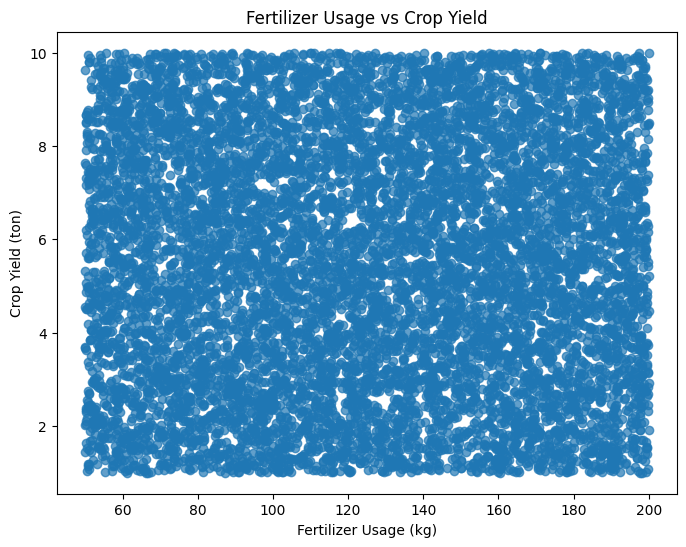

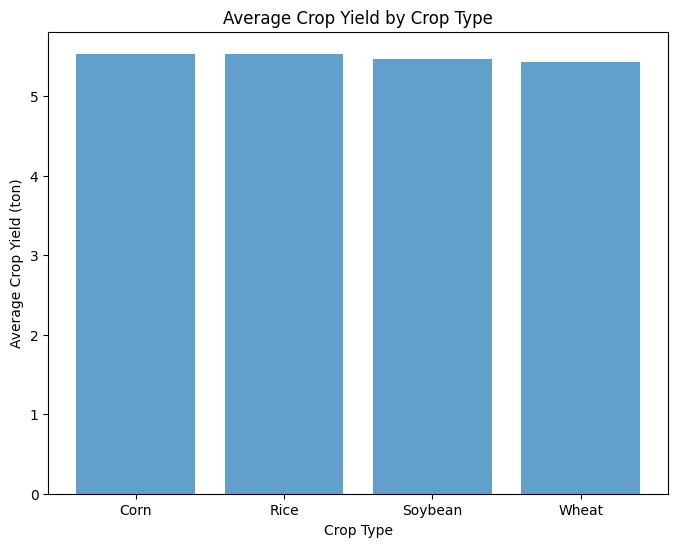

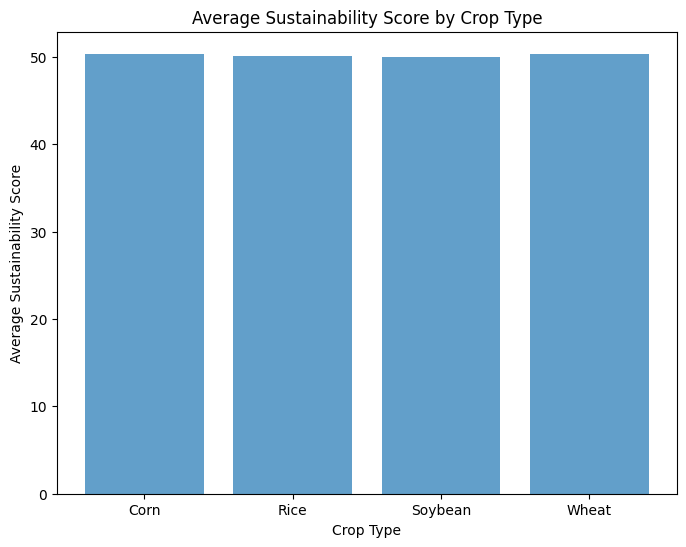

In [15]:
# Relationship between fertilizer usage and crop yield.
plt.figure(figsize=(8,6))
plt.scatter(farmer_df['Fertilizer_Usage_kg'], farmer_df['Crop_Yield_ton'], alpha=0.7)
plt.xlabel("Fertilizer Usage (kg)")
plt.ylabel("Crop Yield (ton)")
plt.title("Fertilizer Usage vs Crop Yield")
plt.show()

# Plot average crop yield by crop type.
plt.figure(figsize=(8,6))
plt.bar(farmers_grouped['Crop_Type'], farmers_grouped['Crop_Yield_ton'], alpha=0.7)
plt.xlabel("Crop Type")
plt.ylabel("Average Crop Yield (ton)")
plt.title("Average Crop Yield by Crop Type")
plt.show()

# Plot average sustainability score by crop type.
plt.figure(figsize=(8,6))
plt.bar(farmers_grouped['Crop_Type'], farmers_grouped['Sustainability_Score'], alpha=0.7)
plt.xlabel("Crop Type")
plt.ylabel("Average Sustainability Score")
plt.title("Average Sustainability Score by Crop Type")
plt.show()

### 4. Design a question and answer based off the data to wow us

#### Question: What strategy can farmers adopt to increase sustainability and profitability considering that on-farm performance (yield, sustainability, and input usage) is almost the same for all crops like rice, wheat, soybean, and corn?

#### Answers
- Focus on Market Differentiators:  The data shows that Rice has a little higher consumer index (100) compared to the other crop, which commands a premium consumer trend index and competitive market pricing. 
- Use precision agriculture techniques to optimize the use of fertilizer and pesticides, minimizing wasteful use of inputs, reducing costs, and reducing environmental impact, allowing for higher profit margins.

In [16]:
market_grouped

,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Consumer_Trend_Index
0,Corn,300.485151,124.713699,125.097808,299.105504,0.996569,49.462663,98.787840
1,Rice,300.840173,126.393042,123.990556,301.775374,1.000971,50.214386,100.397527
2,Soybean,299.146858,124.654164,126.152307,301.608322,1.008414,51.008982,99.230870
3,Wheat,298.084359,124.571301,124.982548,300.691500,1.008041,51.020511,99.861441
